# Variance

On this notebook we calculated the variance of the FPT for the 50 radii. This let us now the optimum scale (circle radius) to analyse the foraging behavior. The optimum radius was the one where the logarithm of the variance is maximized. 



## Input

**newbigdf_clean:** file in csv format containing the dataframe obtained in the first step **Data Cleaning**.

## Output
**df_analysis:** dataframe that includes the variance for every individual and each trajectory.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(context='poster', style='ticks', palette='Accent', font='Linux Biolinum O')

In [3]:
#Read the file
df=pd.read_csv('newbigdf_clean.csv')

In [4]:
df.columns 

Index(['ID', 'date', 'Day', 'Reloc', 'x', 'y', 'dt', 'dist', 'FPT_n',
       'FPT_value', 'radio'],
      dtype='object')

In [5]:
#Calculate the logaritm of the variance of the FPT results for the 50 radii
df2=df.groupby(['ID', 'Day', 'radio'], as_index=False).FPT_value.aggregate(lambda x: np.var(np.log(x)))
df2.head()

,ID,Day,radio,FPT_value
0,1,1,12.00000,0.423027
1,1,1,16.85714,0.473618
2,1,1,21.71429,0.493069
3,1,1,26.57143,0.520483
4,1,1,31.42857,0.507973


In [43]:
df2=df2.rename(columns={'FPT_value':'Variance', 'Day' : 'Trajectory', 'radio':'Radius'}) 
df=df.rename(columns={'FPT_value':'Variance', 'Day' : 'Trajectory', 'radio':'Radius'}) 

Line chart of the variance of the FPT for the 50 radii

C:\Users\Francisca\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


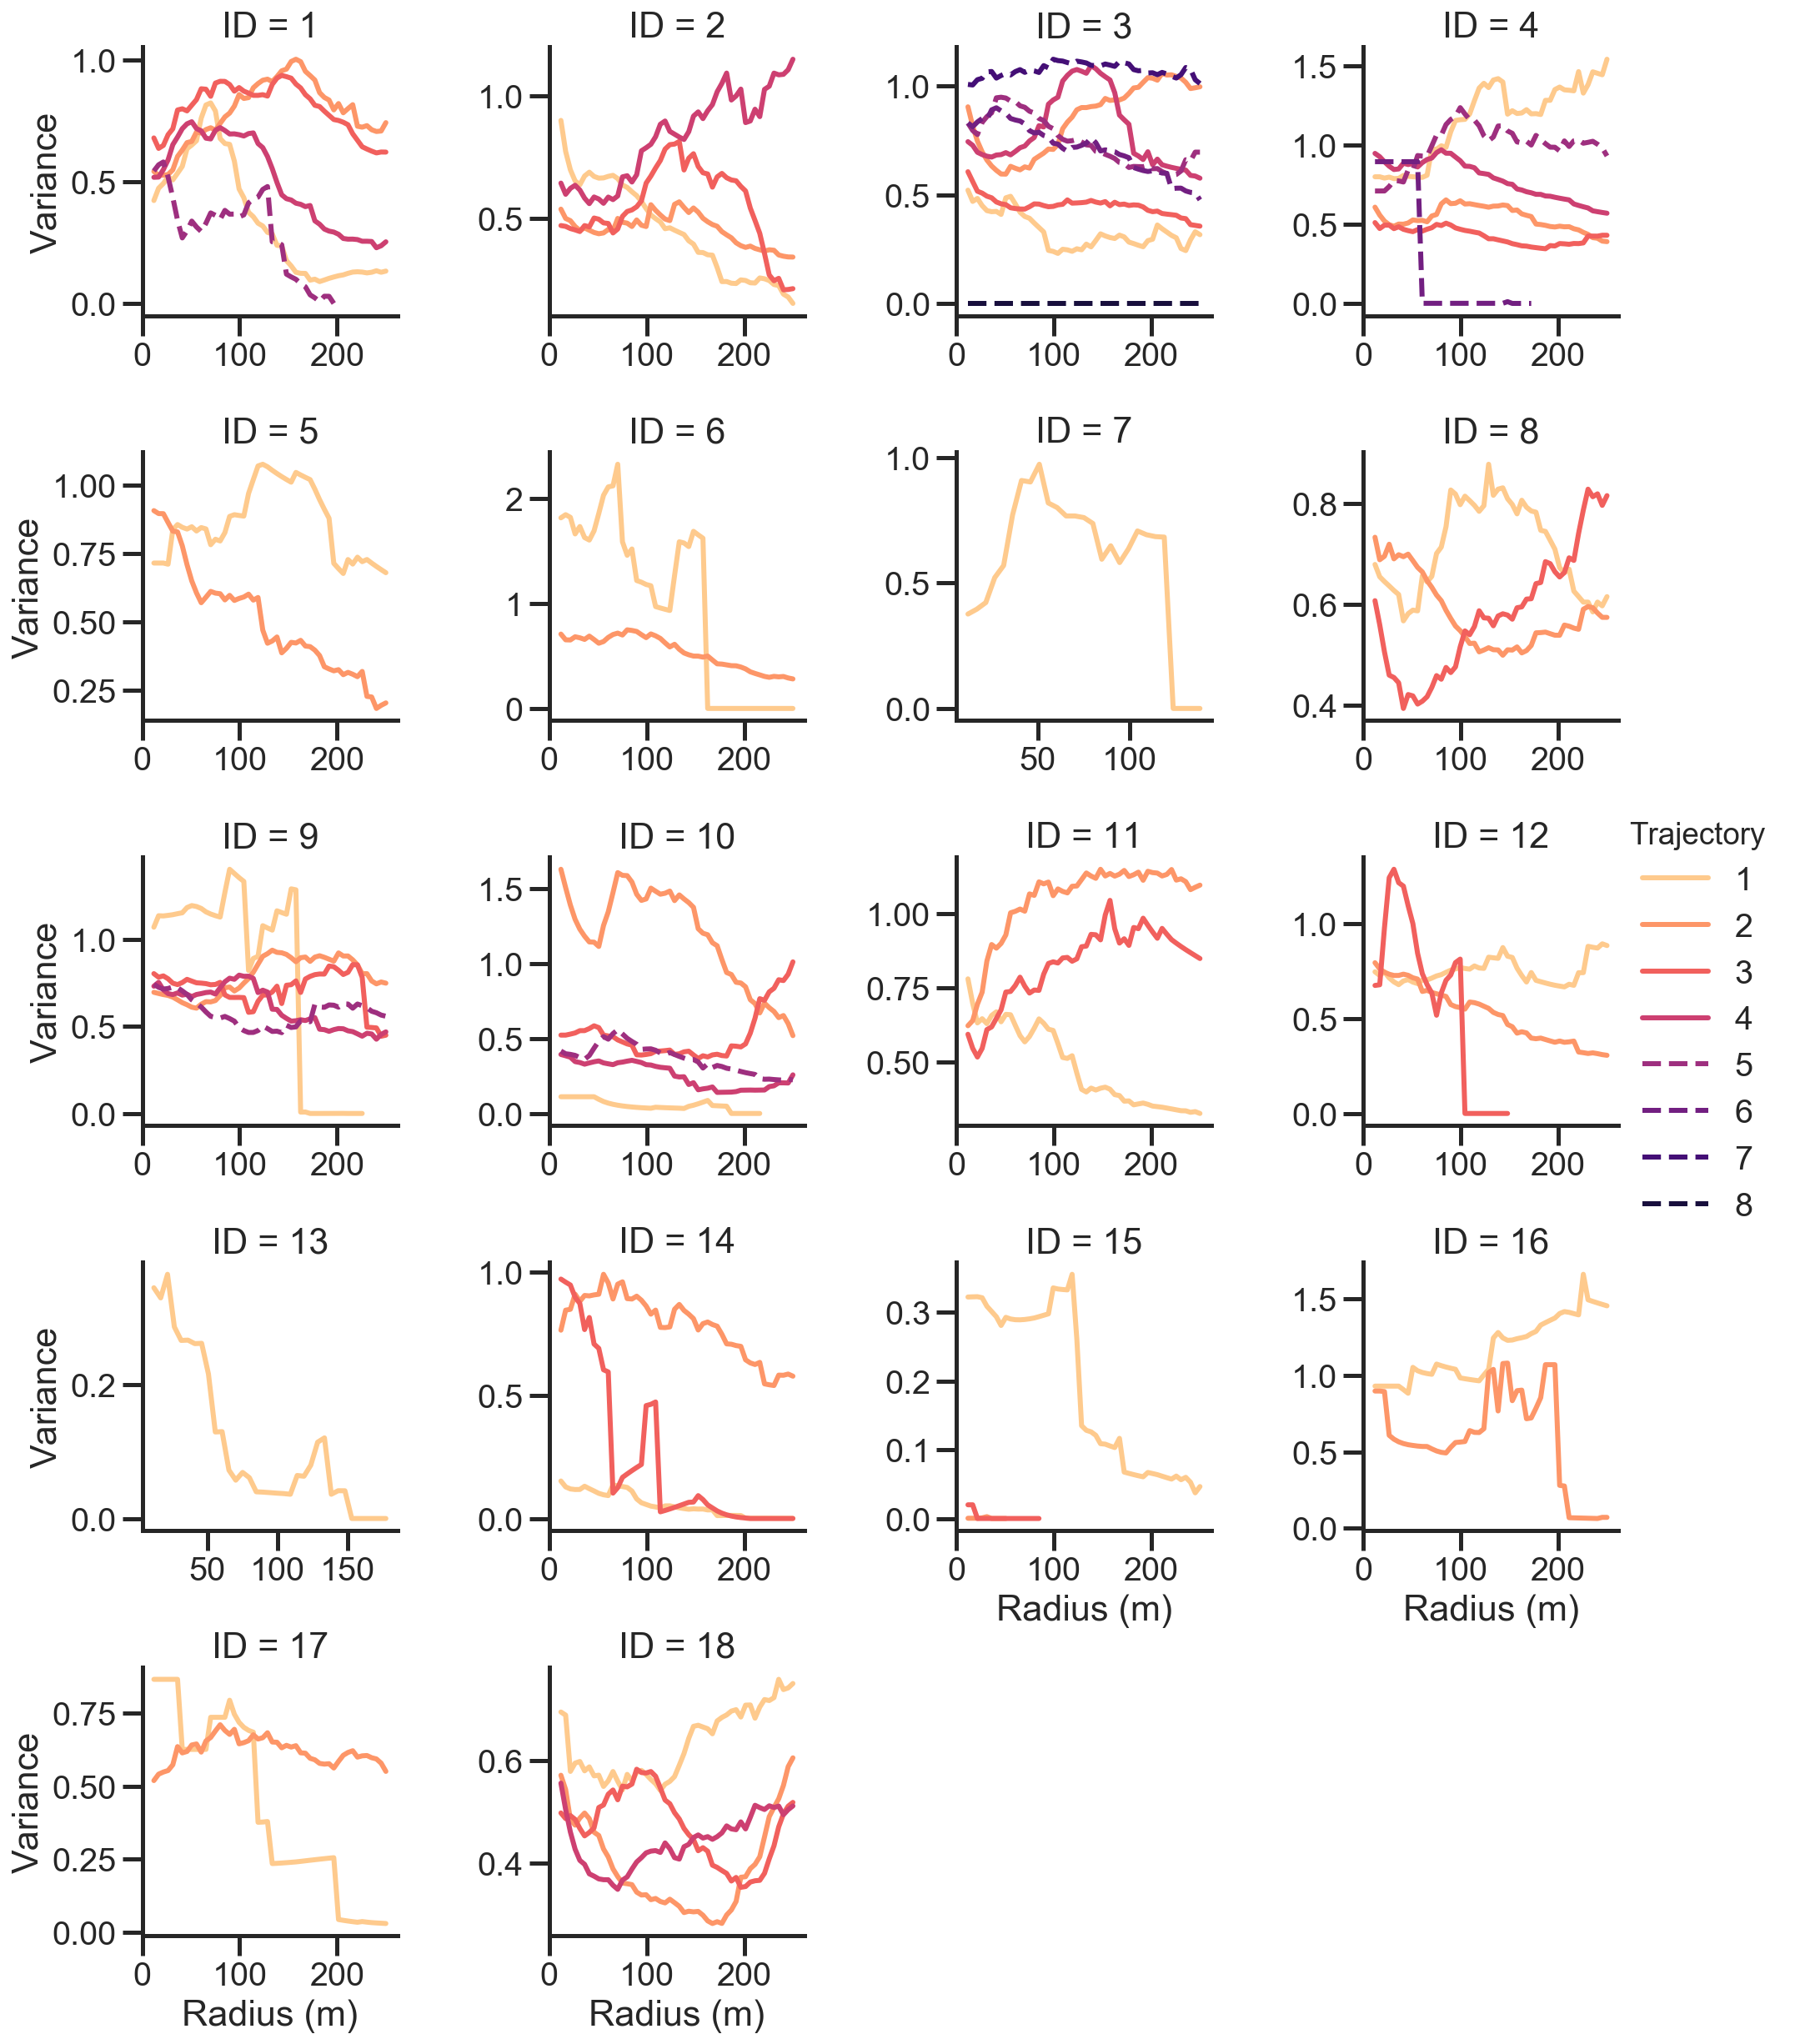

In [29]:
sns.set(context='poster', style='ticks', palette='Accent', font='Arial', font_scale=0.9)
g=sns.FacetGrid(df2, col="ID", hue="Trajectory", sharey=False,sharex=False, palette="magma_r", col_wrap=4, 
                size= 3.5,
                hue_kws=dict(linestyle=["-", "-", "-", "-", "--", "--","--","--"])
               )
g = (g.map(plt.plot, "Radius", "Variance").add_legend())

g.set_xlabels('Radius (m)')
plt.savefig("Varianza_magma.jpg") #Guardar el archivo en formato jpg


For the trajectories where we couldn't find a maximum variance (i.e. trajectories where the variance decreased or increased when increasing the radius) we calculated local maximums. We did this for trajectory 1 of the 4th indiviual, trajectory 2 of the 10th individual, trajectory 3 of the 14th individual and trajectory 1 of the 17th individual 17th.

In [13]:
#Search the variance below the radius 150 for the trajectory 1 of the 4th individual
df4_1=df2[(df2.ID==4)& (df2.Trajectory==1) & (df2.Radius < 150)]
df4_1.head()

,ID,Trajectory,Radius,Variance
850,4,1,12.00000,0.799376
851,4,1,16.85714,0.799376
852,4,1,21.71429,0.791121
853,4,1,26.57143,0.797174
854,4,1,31.42857,0.787689


In [14]:
#Search the variance over the radius 50 for the trajectory 2 of the 10th individual
df10=df2[(df2.ID==10)& (df2.Trajectory==2) & (df2.Radius >= 50)]
df10.head()

,ID,Trajectory,Radius,Variance
1858,10,2,50.85714,1.113573
1859,10,2,55.71429,1.253348
1860,10,2,60.57143,1.344551
1861,10,2,65.42857,1.473070
1862,10,2,70.28571,1.605977


In [15]:
#Search the variance over the radius 50 for the trajectory 3 of the 14th individual
df14=df2[(df2.ID==14)& (df2.Trajectory==3) & (df2.Radius >= 50)]
df14.head()

,ID,Trajectory,Radius,Variance
2508,14,3,50.85714,0.690833
2509,14,3,55.71429,0.603947
2510,14,3,60.57143,0.595274
2511,14,3,65.42857,0.103017
2512,14,3,70.28571,0.125273


In [16]:
#Search the variance over the radius 50 for the trajectory 1 of the 17th individual
df17=df2[(df2.ID==17)& (df2.Trajectory==1) & (df2.Radius >= 50)]
df17.head()

,ID,Trajectory,Radius,Variance
2808,17,1,50.85714,0.626561
2809,17,1,55.71429,0.626561
2810,17,1,60.57143,0.626561
2811,17,1,65.42857,0.626561
2812,17,1,70.28571,0.736678


We did a groupby of all the dataframes (**df2**, **df4_1**, **df10**,**df14** and **df17**) to obtain one dataframe with the radius that maximises the variance


In [32]:
#Calculate the radius where the variance is maximised in df2
df3=df2.groupby(['ID','Trajectory'], as_index=False).apply(lambda x: x.loc[x.Variance.argmax()][['Radius','Variance']] ).reset_index()

df3

C:\Users\Francisca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


,ID,Trajectory,Radius,Variance
0,1,1,70.28571,0.824385
1,1,2,157.71429,1.003988
2,1,3,143.14286,0.937608
3,1,4,50.85714,0.746978
4,1,5,21.71429,0.581477
5,2,1,12.00000,0.899232
6,2,2,133.42857,0.568506
7,2,3,133.42857,0.813866
8,2,4,250.00000,1.147785
9,3,1,12.00000,0.521167


In [22]:
#Calculate the radius where the variance is maximised in df4_1
df_41=df4_1.groupby(['ID','Trajectory'], as_index=False).apply(lambda x: x.loc[x.Variance.argmax()][['Radius','Variance']] ).reset_index()
df_41

C:\Users\Francisca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


876,ID,Trajectory,Radius,Variance
0,4,1,138.28571,1.418702


In [23]:
#Calculate the radius where the variance is maximised in df10
df_10=df10.groupby(['ID','Trajectory'], as_index=False).apply(lambda x: x.loc[x.Variance.argmax()][['Radius','Variance']] ).reset_index()
df_10

C:\Users\Francisca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


1862,ID,Trajectory,Radius,Variance
0,10,2,70.28571,1.605977


In [25]:
#Calculate the radius where the variance is maximised in df14
df_14=df14.groupby(['ID','Trajectory'], as_index=False).apply(lambda x: x.loc[x.Variance.argmax()][['Radius','Variance']] ).reset_index()
df_14

C:\Users\Francisca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


2508,ID,Trajectory,Radius,Variance
0,14,3,50.85714,0.690833


In [26]:
#Calculate the radius where the variance is maximised in df17
df_17=df17.groupby(['ID','Trajectory'], as_index=False).apply(lambda x: x.loc[x.Variance.argmax()][['Radius','Variance']] ).reset_index()
df_17

C:\Users\Francisca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


2816,ID,Trajectory,Radius,Variance
0,17,1,89.71429,0.795186


Delete the data where the variance just increased or decreased.

In [33]:
df3=df3.drop(df.index[[5,8,9,10,11,15,16,17,19,22,24,29,30,35,36,37,38,39,41,42,44,45,48,50,52,53,56,58,59,61]])
df3

,ID,Trajectory,Radius,Variance
0,1,1,70.28571,0.824385
1,1,2,157.71429,1.003988
2,1,3,143.14286,0.937608
3,1,4,50.85714,0.746978
4,1,5,21.71429,0.581477
6,2,2,133.42857,0.568506
7,2,3,133.42857,0.813866
12,3,4,138.28571,1.094193
13,3,5,46.00000,0.948962
14,3,6,41.14286,0.900372


Concat **df_41**, **df_10**, **df_14** and **df_17** to **df3**

In [35]:
df3=pd.concat([df3, df_41, df_10, df_14,df_17], ignore_index=True)
df3=df3.sort_values(['ID', 'Trajectory']).reset_index(drop=True) 
df3

,ID,Trajectory,Radius,Variance
0,1,1,70.28571,0.824385
1,1,2,157.71429,1.003988
2,1,3,143.14286,0.937608
3,1,4,50.85714,0.746978
4,1,5,21.71429,0.581477
5,2,2,133.42857,0.568506
6,2,3,133.42857,0.813866
7,3,4,138.28571,1.094193
8,3,5,46.00000,0.948962
9,3,6,41.14286,0.900372


Join the **"df"** to **"df3"** to obtain all the variables

In [47]:
new_df=pd.merge(df, df3, on=['ID', 'Trajectory', "Radius"], how='inner')
#new_df=new_df.sort_values(['ID','Trajetory']) 
new_df
#New_df is a dataframe with just one value of FPT per trajectory

,ID,date,Trajectory,Reloc,x,y,dt,dist,FPT_n,Variance_x,Radius,Variance_y
0,1,2014-10-12 11:06:00,5,1.0,579883.3633,3912439.888,120.0,NaN,FPT3,NaN,21.71429,0.581477
1,1,2014-10-12 11:10:00,5,3.0,579974.2681,3912451.513,120.0,29.549326,FPT3,145.047181,21.71429,0.581477
2,1,2014-10-12 11:12:00,5,4.0,580000.3472,3912465.407,120.0,178.746743,FPT3,102.759539,21.71429,0.581477
3,1,2014-10-12 11:14:00,5,5.0,579970.7361,3912641.684,120.0,38.357050,FPT3,82.510813,21.71429,0.581477
4,1,2014-10-12 11:16:00,5,6.0,580005.0780,3912658.769,120.0,146.686587,FPT3,85.696946,21.71429,0.581477
5,1,2014-10-12 11:18:00,5,7.0,579894.8325,3912562.007,120.0,131.173642,FPT3,37.628439,21.71429,0.581477
6,1,2014-10-12 11:20:00,5,8.0,579996.4975,3912644.897,120.0,141.410681,FPT3,38.291191,21.71429,0.581477
7,1,2014-10-12 11:22:00,5,9.0,579976.5661,3912504.898,120.0,15.174760,FPT3,153.296924,21.71429,0.581477
8,1,2014-10-12 11:24:00,5,10.0,579964.0423,3912496.329,120.0,81.633902,FPT3,157.651878,21.71429,0.581477
9,1,2014-10-12 11:26:00,5,11.0,580007.8324,3912565.224,120.0,82.420105,FPT3,63.534544,21.71429,0.581477


Verify the join function with **drop_duplicates** which should result in a dataframe with the same number of rows that **"df3"**

In [48]:
df_check=new_df.drop_duplicates(subset= ['ID', 'Trajectory', 'Radius'])
df_check

,ID,date,Trajectory,Reloc,x,y,dt,dist,FPT_n,Variance_x,Radius,Variance_y
0,1,2014-10-12 11:06:00,5,1.0,579883.3633,3912439.888,120.0,NaN,FPT3,NaN,21.71429,0.581477
30,13,2015-01-03 13:30:00,1,1.0,580888.9183,3912300.878,300.0,12.381771,FPT3,NaN,21.71429,0.364374
51,12,2014-12-25 08:05:00,3,1.0,585540.4955,3909696.227,300.0,17.337439,FPT5,NaN,31.42857,1.287240
67,3,2014-11-02 11:55:00,6,1.0,586593.3839,3911472.198,300.0,NaN,FPT7,NaN,41.14286,0.900372
131,3,2014-11-01 11:00:00,5,1.0,586976.9359,3911141.088,300.0,NaN,FPT8,NaN,46.00000,0.948962
202,1,2014-10-11 11:18:00,4,1.0,579659.3346,3912323.887,120.0,185.468681,FPT9,NaN,50.85714,0.746978
513,7,2014-10-03 21:09:00,1,1.0,580132.2204,3912276.618,60.0,20.443378,FPT9,NaN,50.85714,0.973978
560,14,2015-01-20 11:25:00,3,1.0,593864.2680,3909900.059,300.0,NaN,FPT9,NaN,50.85714,0.690833
590,14,2015-01-19 11:20:00,2,1.0,593878.2464,3909943.402,300.0,25.756486,FPT10,NaN,55.71429,0.991682
650,1,2014-10-08 18:02:00,1,1.0,579778.3163,3912570.091,120.0,14.882624,FPT13,NaN,70.28571,0.824385


In [49]:
df_analysis = new_df.dropna(axis=0, how='any') #Delete rows with NaN
df_analysis


,ID,date,Trajectory,Reloc,x,y,dt,dist,FPT_n,Variance_x,Radius,Variance_y
1,1,2014-10-12 11:10:00,5,3.0,579974.2681,3912451.513,120.0,29.549326,FPT3,145.047181,21.71429,0.581477
2,1,2014-10-12 11:12:00,5,4.0,580000.3472,3912465.407,120.0,178.746743,FPT3,102.759539,21.71429,0.581477
3,1,2014-10-12 11:14:00,5,5.0,579970.7361,3912641.684,120.0,38.357050,FPT3,82.510813,21.71429,0.581477
4,1,2014-10-12 11:16:00,5,6.0,580005.0780,3912658.769,120.0,146.686587,FPT3,85.696946,21.71429,0.581477
5,1,2014-10-12 11:18:00,5,7.0,579894.8325,3912562.007,120.0,131.173642,FPT3,37.628439,21.71429,0.581477
6,1,2014-10-12 11:20:00,5,8.0,579996.4975,3912644.897,120.0,141.410681,FPT3,38.291191,21.71429,0.581477
7,1,2014-10-12 11:22:00,5,9.0,579976.5661,3912504.898,120.0,15.174760,FPT3,153.296924,21.71429,0.581477
8,1,2014-10-12 11:24:00,5,10.0,579964.0423,3912496.329,120.0,81.633902,FPT3,157.651878,21.71429,0.581477
9,1,2014-10-12 11:26:00,5,11.0,580007.8324,3912565.224,120.0,82.420105,FPT3,63.534544,21.71429,0.581477
10,1,2014-10-12 11:28:00,5,12.0,579983.3533,3912486.523,120.0,32.543174,FPT3,111.684491,21.71429,0.581477


In [50]:
df_analysis.to_csv("df_analysis.csv", index=False) #Save data in a csv file